# Capstone 3: Pneumonia X-Ray Classification
## Data Wrangling and EDA

## Importing libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os

## Exploring Datasets
1. https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
2. https://www.kaggle.com/datasets/salonimate/covid-pneumonia-nomal-xray


In [16]:
# Define the image size and batch size
img_height = 128
img_width = 128
batch_size = 32

### First Dataset

In [17]:
ds_1_path = '../images/chest_xray'

In [18]:
!ls {ds_1_path}

test  train val


In [19]:
train_dir_2 = f"{ds_1_path}/train"
val_dir_2 = f"{ds_1_path}/val"
test_dir_2 = f"{ds_1_path}/test"

In [20]:
train_ds_1 = image_dataset_from_directory(
    train_dir_2,
    color_mode='grayscale',
    image_size = (img_height, img_width),
    batch_size = batch_size)

val_ds_1 = image_dataset_from_directory(
    val_dir_2,
    color_mode='grayscale',
    image_size = (img_height, img_width),
    batch_size = batch_size)

test_ds_1 = image_dataset_from_directory(
    test_dir_2,
    color_mode='grayscale',
    image_size = (img_height, img_width),
    batch_size = batch_size)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [14]:
# Get the class names
class_names_2 = {i: train_ds_1.class_names[i] for i in range(len(train_ds_1.class_names))}
class_names_2

{0: 'NORMAL', 1: 'PNEUMONIA'}

2024-06-02 13:32:37.596474: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [5216]
	 [[{{node Placeholder/_4}}]]
2024-06-02 13:32:37.596778: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [5216]
	 [[{{node Placeholder/_0}}]]


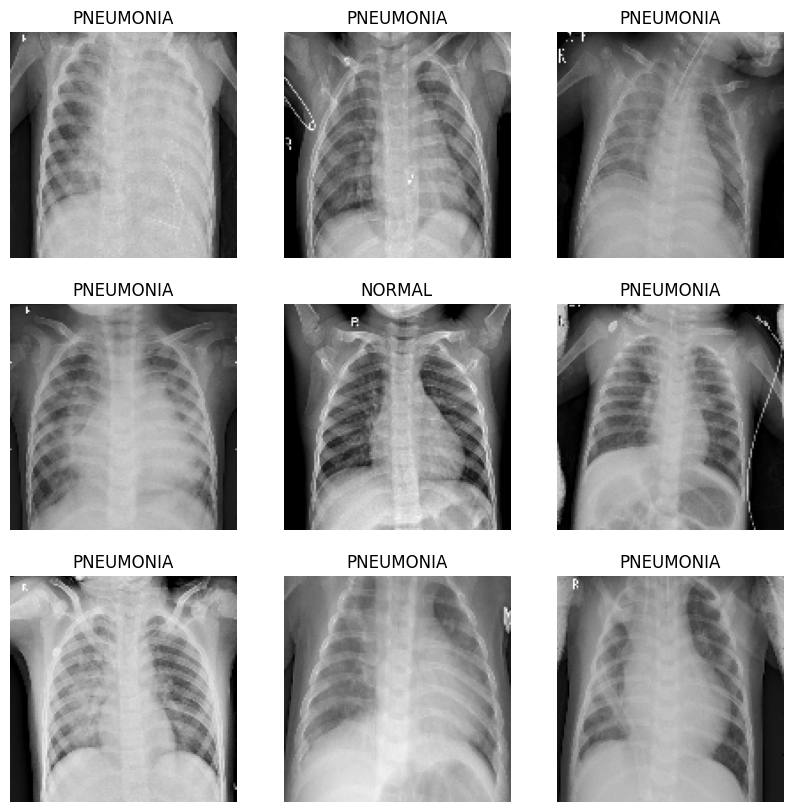

In [21]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds_1.take(1):
    for i in range(9):
        plt.subplot(3,3, i + 1)
        plt.imshow(np.squeeze(images[i].numpy().astype('uint8')), cmap='gray')
        plt.title(train_ds_1.class_names[labels[i]])
        plt.axis("off")

### Second Dataset

In [22]:
ds_2_path = '../images/New-CNP-Dataset'

In [23]:
!ls {ds_2_path}

testing    train      validation


In [24]:
train_dir_2 = f"{ds_2_path}/train"
val_dir_2 = f"{ds_2_path}/validation"
test_dir_2 = f"{ds_2_path}/testing"

In [25]:
train_ds_2 = image_dataset_from_directory(
    train_dir_2,
    color_mode='grayscale',
    image_size = (img_height, img_width),
    batch_size = batch_size)

val_ds_2 = image_dataset_from_directory(
    val_dir_2,
    color_mode='grayscale',
    image_size = (img_height, img_width),
    batch_size = batch_size)

test_ds_2 = image_dataset_from_directory(
    test_dir_2,
    color_mode='grayscale',
    image_size = (img_height, img_width),
    batch_size = batch_size)

Found 4488 files belonging to 3 classes.
Found 1033 files belonging to 3 classes.
Found 1381 files belonging to 3 classes.


In [26]:
# Get the class names
class_names_2 = {i: train_ds_2.class_names[i] for i in range(len(train_ds_2.class_names))}
class_names_2

{0: 'covid', 1: 'normal', 2: 'pneumonia'}

2024-06-02 13:34:16.710031: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [4488]
	 [[{{node Placeholder/_4}}]]
2024-06-02 13:34:16.710345: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [4488]
	 [[{{node Placeholder/_4}}]]


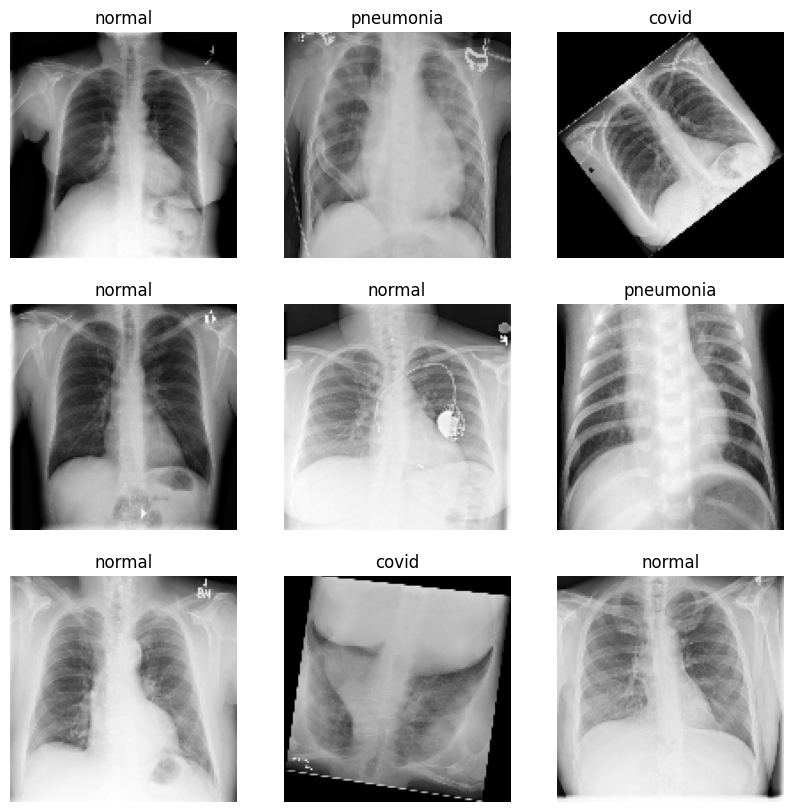

In [27]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds_2.take(1):
    for i in range(9):
        plt.subplot(3,3, i + 1)
        plt.imshow(np.squeeze(images[i].numpy().astype('uint8')), cmap='gray')
        plt.title(train_ds_2.class_names[labels[i]])
        plt.axis("off")

# Datasets Summary and Combination Approach

The first dataset (2 Classes: `NORMAL`, `PNEUMONIA`)

- `Train`: 
    - 5216 files
- `Validation`:  
    - 16 files
- `Test`: 
    - 624 files

The second dataset (3 Classes: `covid`, `normal`, `pneumonia`):

- `Train`:
    - 4488 files
- `Validation`:
    - 1033 files
- `Test`:
    - 1381 files

There is an additional class in the second dataset: `covid`. 
As our model will be the pneumonia classificator, it will return only 2 classes: `NORMAL` and `PNEUMONINA`. 
Two possible approaches to dead with the third class in the second dataset are: 
- Treat covid images as pneumonia,
- Drop all these images alltogether.

Several studies have concluded that Covid X-Rays could improve model's ability to classify pneumonia by making it more robust to variations. However it's crutial to to avoid overfitting to specific features of COVID-19 that are not present in other types of pneumonia. So if the COVID images are not typical of pneumonia, they could potentially confuse the model.

The __approach__ chosen in this work is:
- Train the model on the `NORMAL` and `PNEUMONIA` classes from both datasets as the base model.
- Then finetune the model on the `covid` images and compare the performance vs the base model.

# Creating the Final Image Directory

In [33]:
# Create new folder in the images directory called 'combined'
combined_dir = '../images/combined'
os.makedirs(combined_dir, exist_ok=True)

In [34]:
# Create new folders in the combined directory for train, val, and test
train_dir = f"{combined_dir}/train"
val_dir = f"{combined_dir}/val"
test_dir = f"{combined_dir}/test"

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [36]:
# Copy the images from the two datasets to the combined directory
!cp -r {ds_1_path}/train/NORMAL {train_dir}
!cp -r {ds_1_path}/train/PNEUMONIA {train_dir}
!cp -r {ds_1_path}/val/NORMAL {val_dir}
!cp -r {ds_1_path}/val/PNEUMONIA {val_dir}
!cp -r {ds_1_path}/test/NORMAL {test_dir}
!cp -r {ds_1_path}/test/PNEUMONIA {test_dir}

# Copy the images fom the second dataset to the combined directory, but change the class names to match the first dataset class names and skip the covid images
!cp -r {ds_2_path}/train/normal {train_dir}/NORMAL
!cp -r {ds_2_path}/train/pneumonia {train_dir}/PNEUMONIA
!cp -r {ds_2_path}/validation/normal {val_dir}/NORMAL
!cp -r {ds_2_path}/validation/pneumonia {val_dir}/PNEUMONIA
!cp -r {ds_2_path}/testing/normal {test_dir}/NORMAL
!cp -r {ds_2_path}/testing/pneumonia {test_dir}/PNEUMONIA

In [37]:
# Create the new datasets
train_ds = image_dataset_from_directory(
    train_dir,
    color_mode='grayscale',
    image_size = (img_height, img_width),
    batch_size = batch_size)

val_ds = image_dataset_from_directory(
    val_dir,
    color_mode='grayscale',
    image_size = (img_height, img_width),
    batch_size = batch_size)

test_ds = image_dataset_from_directory(
    test_dir,
    color_mode='grayscale',
    image_size = (img_height, img_width),
    batch_size = batch_size)


Found 8226 files belonging to 2 classes.
Found 708 files belonging to 2 classes.
Found 1548 files belonging to 2 classes.


In [38]:
# Get the class names
class_names = {i: train_ds.class_names[i] for i in range(len(train_ds.class_names))}
class_names

{0: 'NORMAL', 1: 'PNEUMONIA'}

2024-06-02 14:08:49.789007: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [8226]
	 [[{{node Placeholder/_0}}]]
2024-06-02 14:08:49.789323: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [8226]
	 [[{{node Placeholder/_4}}]]


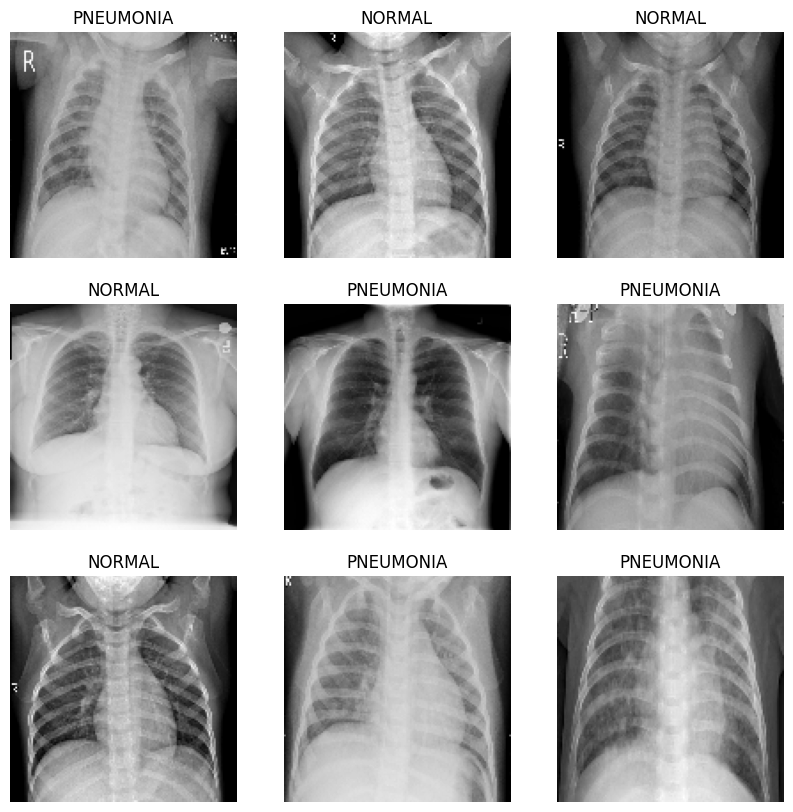

In [39]:
# Plot the images
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i + 1)
        plt.imshow(np.squeeze(images[i].numpy().astype('uint8')), cmap='gray')
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")

# Summary

The two initial datasets were combined in one, which has 2 classes: `NORMAL` and `PNEUMONIA`. 
- 8226 files in the `TRAIN` set
- 708 files in the `VALIDAION` set
- 1548 files in the `TEST` set
The `covid` images are kept for later finetuning and of the base model.